This is an assignment for my thinkful data science course - "Data Cleaning 2"
Raj Prasad
May 2019

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

used_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
used_df.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
1491,2017_WYOMING,WYOMING,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


In [5]:
used_df.nunique()


PRIMARY_KEY                     1487
STATE                             80
YEAR                              26
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1261
GRADES_KG_G                     1348
GRADES_4_G                      1340
GRADES_8_G                      1347
GRADES_12_G                     1342
GRADES_1_8_G                    1360
GRADES_9_12_G                   1358
GRADES_ALL_G                    1318
AVG_MATH_4_SCORE                 535
AVG_MATH_8_SCORE                 531
AVG_READING_4_SCORE              532
AVG_READING_8_SCORE              497
dtype: int64

In [6]:
#check for null-like entries in categorical variables
u_state = list(used_df.STATE.unique())
u_year = list(used_df.YEAR.unique())
#pd.DataFrame([u_state, u_year]).transpose()
print(u_state)
print(u_year)

['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS', 'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM', 'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD', 'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE', 'BUREAU_OF_INDIAN_EDUCATION', 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'U.S._VIRGIN_ISLANDS', 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)', 'BIE', 'DOD

In [7]:
used_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


1a. Determine all the variable types 

These are nominal: 
* PRIMARY_KEY                     1487
* STATE                             80

This is ordinal:
* YEAR                              26

These are 


These are ratio: 
* ENROLL                          1224
* TOTAL_REVENUE                   1274
* FEDERAL_REVENUE                 1275
* STATE_REVENUE                   1251
* LOCAL_REVENUE                   1275
* TOTAL_EXPENDITURE               1275
* INSTRUCTION_EXPENDITURE         1275
* SUPPORT_SERVICES_EXPENDITURE    1275
* OTHER_EXPENDITURE               1222
* CAPITAL_OUTLAY_EXPENDITURE      1275
* GRADES_PK_G                     1261
* GRADES_KG_G                     1348
* GRADES_4_G                      1340
* GRADES_8_G                      1347
* GRADES_12_G                     1342
* GRADES_1_8_G                    1360
* GRADES_9_12_G                   1358
* GRADES_ALL_G                    1318
* AVG_MATH_4_SCORE                 535
* AVG_MATH_8_SCORE                 531
* AVG_READING_4_SCORE              532
* AVG_READING_8_SCORE              497

1b  find the fraction of the missing values for each variable.

In [8]:
n = len(used_df)
cols = used_df.columns
num_null = [len(used_df[used_df[col].isnull()]) / n for col in used_df]
pd.DataFrame([cols, num_null]).transpose()

,0,1
0,PRIMARY_KEY,0
1,STATE,0
2,YEAR,0
3,ENROLL,0.176273
4,TOTAL_REVENUE,0.142091
5,FEDERAL_REVENUE,0.142091
6,STATE_REVENUE,0.142091
7,LOCAL_REVENUE,0.142091
8,TOTAL_EXPENDITURE,0.142091
9,INSTRUCTION_EXPENDITURE,0.142091


2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

If there's no order (as year would impose), then I would use the mean or median for all the continuouse variables that are null.  There are too many to throw out any record with  a null. I'll use mean. 

In [9]:
used_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [22]:
col_list = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'] 

for col in col_list:
    ave = used_df[col].mean()
    used_df[(col+"v1")] = used_df[(col)].fillna(ave, inplace=False)

In [23]:
n = len(used_df)
cols = used_df.columns
num_null = [len(used_df[used_df[col].isnull()]) / n for col in used_df]
pd.DataFrame([cols, num_null]).transpose()

,0,1
0,PRIMARY_KEY,0
1,STATE,0
2,YEAR,0
3,ENROLL,0.176273
4,TOTAL_REVENUE,0.142091
5,FEDERAL_REVENUE,0.142091
6,STATE_REVENUE,0.142091
7,LOCAL_REVENUE,0.142091
8,TOTAL_EXPENDITURE,0.142091
9,INSTRUCTION_EXPENDITURE,0.142091


In [24]:
years = used_df["YEAR"].unique()


#loop through each column in the dataframe
for col in col_list:
    new_col = []
    year_ave = []
    for y in years: 
        year_ave.append(np.nanmean(used_df[used_df["YEAR"] == y][col]))
    year_ave_dict = dict(zip(years, year_ave))
    overall_ave = used_df[col].mean()
    for row in used_df.itertuples():
        curr_val = getattr(row, col)
        curr_year = getattr(row, "YEAR")
        curr_year_ave = year_ave_dict.get(curr_year)
        if np.isnan(curr_val): 
            if np.isnan(curr_year_ave): 
                new_col.append(overall_ave)
            else: 
                new_col.append(curr_year_ave)
        else: new_col.append(curr_val)
    used_df[col + "v2"] = new_col

In [25]:
n = len(used_df)
cols = used_df.columns
num_null = [len(used_df[used_df[col].isnull()]) / n for col in used_df]
pd.DataFrame([cols, num_null]).transpose()

,0,1
0,PRIMARY_KEY,0
1,STATE,0
2,YEAR,0
3,ENROLL,0.176273
4,TOTAL_REVENUE,0.142091
5,FEDERAL_REVENUE,0.142091
6,STATE_REVENUE,0.142091
7,LOCAL_REVENUE,0.142091
8,TOTAL_EXPENDITURE,0.142091
9,INSTRUCTION_EXPENDITURE,0.142091


In [14]:
used_df["new_pk"] = used_df.STATE + used_df.YEAR.map(str)
used_df.sort_values(by="new_pk").head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_Gv2,GRADES_12_Gv2,GRADES_1_8_Gv2,GRADES_9_12_Gv2,GRADES_ALL_Gv2,AVG_MATH_4_SCOREv2,AVG_MATH_8_SCOREv2,AVG_READING_4_SCOREv2,AVG_READING_8_SCOREv2,new_pk
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,ALABAMA1992
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,60004.0,39900.0,470775.0,198651.0,677690.0,234.768293,278.414711,218.866154,263.661132,ALABAMA1993
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,59165.0,41730.0,468472.0,201285.0,678808.0,234.768293,278.414711,218.866154,263.661132,ALABAMA1994
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,59914.0,40981.0,470246.0,206840.0,686410.0,234.768293,278.414711,218.866154,263.661132,ALABAMA1995
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,ALABAMA1996


In [15]:
new_used_df = used_df.interpolate()
    

In [16]:
n = len(new_used_df)
cols = new_used_df.columns
num_null = [len(new_used_df[new_used_df[col].isnull()]) / n for col in used_df]
pd.DataFrame([cols, num_null]).transpose()

,0,1
0,PRIMARY_KEY,0
1,STATE,0
2,YEAR,0
3,ENROLL,0.0241287
4,TOTAL_REVENUE,0
5,FEDERAL_REVENUE,0
6,STATE_REVENUE,0
7,LOCAL_REVENUE,0
8,TOTAL_EXPENDITURE,0
9,INSTRUCTION_EXPENDITURE,0


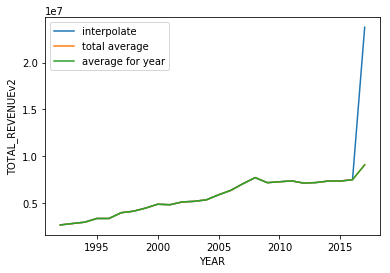

In [17]:
sns.lineplot(x="YEAR", y="TOTAL_REVENUE", data=new_used_df[used_df.STATE == "ALABAMA"], ci=None)
sns.lineplot(x="YEAR", y="TOTAL_REVENUEv1", data=used_df[used_df.STATE == "ALABAMA"], ci=None)
sns.lineplot(x="YEAR", y="TOTAL_REVENUEv2", data=used_df[used_df.STATE == "ALABAMA"], ci=None)
plt.legend(["interpolate", "total average", "average for year"])

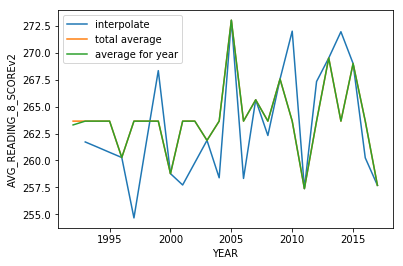

In [18]:
sns.lineplot(x="YEAR", y="AVG_READING_8_SCORE", data=new_used_df[used_df.STATE == "ALABAMA"], ci=None)
sns.lineplot(x="YEAR", y="AVG_READING_8_SCOREv1", data=used_df[used_df.STATE == "ALABAMA"], ci=None)
sns.lineplot(x="YEAR", y="AVG_READING_8_SCOREv2", data=used_df[used_df.STATE == "ALABAMA"], ci=None)
plt.legend(["interpolate", "total average", "average for year"])

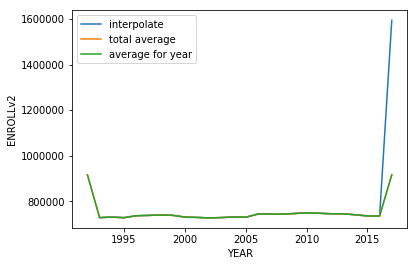

In [19]:
sns.lineplot(x="YEAR", y="ENROLL", data=new_used_df[used_df.STATE == "ALABAMA"], ci=None)
sns.lineplot(x="YEAR", y="ENROLLv1", data=used_df[used_df.STATE == "ALABAMA"], ci=None)
sns.lineplot(x="YEAR", y="ENROLLv2", data=used_df[used_df.STATE == "ALABAMA"], ci=None)
plt.legend(["interpolate", "total average", "average for year"])

In [20]:
used_df.TOTAL_REVENUEv1.head()


0     2678885.0
1     1049591.0
2     3258079.0
3     1711959.0
4    26260025.0
Name: TOTAL_REVENUEv1, dtype: float64

In [21]:
new_used_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_Gv2,GRADES_12_Gv2,GRADES_1_8_Gv2,GRADES_9_12_Gv2,GRADES_ALL_Gv2,AVG_MATH_4_SCOREv2,AVG_MATH_8_SCOREv2,AVG_READING_4_SCOREv2,AVG_READING_8_SCOREv2,new_pk
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,ALABAMA1992
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,ALASKA1992
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,ARIZONA1992
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,ARKANSAS1992
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067,CALIFORNIA1992
